## #1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset
**Adjusting each dataset to be only related to Pays de la Loire**
- Hotel nights for regions bordering Pays de la loire
- Weather for regions bordering Pays de la loire
- Gross regional product
- Days off

Region | 
--- | 
Pays de la loire |
Bretagne | 
Normandie | 
Centre Val de Loire |
Nouvelle Aquitaine | 

In [2]:
data_nights = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/nights_2010-2017.csv')
data_nights = data_nights.drop('Unnamed: 0', axis=1)
data_nights

nights_PDL = data_nights[['date', 'nights_PDL', 'nights_BRE', 'nights_NOR', 'nights_CVL', 'nights_NAQ']]
nights_PDL['date'].apply(pd.to_datetime)
nights_PDL = nights_PDL.set_index('date')

nights_PDL

nights_PDL = nights_PDL.sort_values(by='date')
print(nights_PDL.info())
nights_PDL.head()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 2010-01-01 to 2017-12-01
Data columns (total 5 columns):
nights_PDL    96 non-null float64
nights_BRE    96 non-null float64
nights_NOR    96 non-null float64
nights_CVL    96 non-null float64
nights_NAQ    96 non-null float64
dtypes: float64(5)
memory usage: 4.5+ KB
None


,nights_PDL,nights_BRE,nights_NOR,nights_CVL,nights_NAQ
date,,,,,
2010-01-01,333.33,273.63,341.09,253.94,602.06
2010-02-01,343.87,323.05,381.80,278.21,723.95
2010-03-01,446.19,433.01,492.98,379.48,916.84
2010-04-01,500.07,580.99,669.45,464.01,1218.11
2010-05-01,548.92,675.95,755.69,582.88,1352.00


In [3]:
data_temp = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/avgtemp_2010-2017.csv')
data_temp = data_temp.drop('Unnamed: 0', axis=1)
data_temp

avgtemp_PDL = data_temp[['date', 'avgtemp_PDL', 'avgtemp_BRE', 'avgtemp_NOR', 'avgtemp_CVL', 'avgtemp_NAQ']]
avgtemp_PDL['date'].apply(pd.to_datetime)
avgtemp_PDL = avgtemp_PDL.set_index('date')

avgtemp_PDL

avgtemp_PDL = avgtemp_PDL.sort_values(by='date')
print(avgtemp_PDL.info())
avgtemp_PDL.head()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 2010-01-01 to 2017-12-01
Data columns (total 5 columns):
avgtemp_PDL    96 non-null float64
avgtemp_BRE    96 non-null float64
avgtemp_NOR    96 non-null float64
avgtemp_CVL    96 non-null float64
avgtemp_NAQ    96 non-null float64
dtypes: float64(5)
memory usage: 4.5+ KB
None


,avgtemp_PDL,avgtemp_BRE,avgtemp_NOR,avgtemp_CVL,avgtemp_NAQ
date,,,,,
2010-01-01,4.0,6.0,4.0,2.0,4.886770
2010-02-01,7.0,7.0,6.0,4.0,6.088319
2010-03-01,8.0,8.0,8.0,7.0,9.088319
2010-04-01,13.0,12.0,11.0,12.0,13.781285
2010-05-01,14.0,13.0,13.0,14.0,14.596902


In [4]:
data_daysoff = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/daysoff_2010-2017.csv', index_col='date')
data_daysoff = data_daysoff.drop('Unnamed: 0', axis=1)
data_daysoff.head()

,daysoff
date,
2010-01-01,11
2010-02-01,9
2010-03-01,9
2010-04-01,10
2010-05-01,12


In [5]:
data_gdp = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/regionalGDP_2010-2015.csv')
data_gdp = data_gdp.drop('Unnamed: 0', axis=1)
data_gdp

gdp_PDL = data_gdp[['date', 'gdp_PDL', 'gdp_BRE', 'gdp_NOR', 'gdp_CVL', 'gdp_NAQ']]
gdp_PDL['date'].apply(pd.to_datetime)
gdp_PDL = gdp_PDL.set_index('date')

gdp_PDL

gdp_PDL = gdp_PDL.sort_values(by='date')
print(gdp_PDL.info())
gdp_PDL.head()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2010-01-01 to 2015-12-01
Data columns (total 5 columns):
gdp_PDL    72 non-null float64
gdp_BRE    72 non-null float64
gdp_NOR    72 non-null float64
gdp_CVL    72 non-null float64
gdp_NAQ    72 non-null float64
dtypes: float64(5)
memory usage: 3.4+ KB
None


,gdp_PDL,gdp_BRE,gdp_NOR,gdp_CVL,gdp_NAQ
date,,,,,
2010-01-01,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621
2010-02-01,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621
2010-03-01,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621
2010-04-01,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621
2010-05-01,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621


In [6]:
data_PDL_zone = pd.concat([nights_PDL, avgtemp_PDL, data_daysoff, gdp_PDL], axis=1, sort=False)
data_PDL_zone.index = pd.to_datetime(data_PDL_zone.index)
data_PDL_zone_train = data_PDL_zone.dropna(axis=0, how='any')
print(data_PDL_zone_train.info())
data_PDL_zone_train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2010-01-01 to 2015-12-01
Data columns (total 16 columns):
nights_PDL     72 non-null float64
nights_BRE     72 non-null float64
nights_NOR     72 non-null float64
nights_CVL     72 non-null float64
nights_NAQ     72 non-null float64
avgtemp_PDL    72 non-null float64
avgtemp_BRE    72 non-null float64
avgtemp_NOR    72 non-null float64
avgtemp_CVL    72 non-null float64
avgtemp_NAQ    72 non-null float64
daysoff        72 non-null int64
gdp_PDL        72 non-null float64
gdp_BRE        72 non-null float64
gdp_NOR        72 non-null float64
gdp_CVL        72 non-null float64
gdp_NAQ        72 non-null float64
dtypes: float64(15), int64(1)
memory usage: 9.6 KB
None


,nights_PDL,nights_BRE,nights_NOR,nights_CVL,nights_NAQ,avgtemp_PDL,avgtemp_BRE,avgtemp_NOR,avgtemp_CVL,avgtemp_NAQ,daysoff,gdp_PDL,gdp_BRE,gdp_NOR,gdp_CVL,gdp_NAQ
2010-01-01,333.33,273.63,341.09,253.94,602.06,4.0,6.0,4.0,2.0,4.886770,11,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621
2010-02-01,343.87,323.05,381.80,278.21,723.95,7.0,7.0,6.0,4.0,6.088319,9,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621
2010-03-01,446.19,433.01,492.98,379.48,916.84,8.0,8.0,8.0,7.0,9.088319,9,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621
2010-04-01,500.07,580.99,669.45,464.01,1218.11,13.0,12.0,11.0,12.0,13.781285,10,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621
2010-05-01,548.92,675.95,755.69,582.88,1352.00,14.0,13.0,13.0,14.0,14.596902,12,96709.073745,81299.450684,85549.671843,65690.501206,148172.239621


### Stationarity check


In [7]:
from statsmodels.tsa.stattools import adfuller

for column in data_PDL_zone_train.columns:
    result = adfuller(data_PDL_zone_train[column])
#     print(f'Stationarity test for variable {column}')
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     print('Critical Values:')

#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))
    
    if result[1] < 0.05:
        print(f'{column}')
        print('Stationary')
        print('-------')

daysoff
Stationary
-------


Result:
- Nights, AvgTemp, GDP are all non-stationary
- Daysoff is stationary (also doesn't require forecasting as we already have the answers)

#### Figure out which series' seasonality is additive or multiplicative

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# ----- Additive Model below -----

add_data = seasonal_decompose(data_PDL_zone_train, model='additive')  

add_trend = add_data.trend.dropna()
add_seasonal = add_data.seasonal.dropna()
add_residual = add_data.resid.dropna()

# stationarity_test(add_residual)

# ----- Multiplicative Model below -----

mult_data = seasonal_decompose(data_PDL_zone_train, model='multiplicative')  

mult_trend = mult_data.trend.dropna()
mult_seasonal = mult_data.seasonal.dropna()
mult_residual = mult_data.resid.dropna()

# stationarity_test(mult_residual)

In [9]:
from statsmodels.tsa.stattools import acf

add_acfs = add_residual.apply(acf, axis=0).apply(np.square, axis=0).apply(np.sum)

mult_acfs = mult_residual.apply(acf, axis=0).apply(np.square, axis=0).apply(np.sum)

additive = add_acfs < mult_acfs
add_cols = additive.index[additive].tolist()
mult_cols = additive.index[~additive].tolist()
print('Additive:', add_cols)
print('Multiplicative', mult_cols)

Additive: ['nights_PDL', 'nights_NOR', 'nights_NAQ', 'daysoff']
Multiplicative ['nights_BRE', 'nights_CVL', 'avgtemp_PDL', 'avgtemp_BRE', 'avgtemp_NOR', 'avgtemp_CVL', 'avgtemp_NAQ', 'gdp_PDL', 'gdp_BRE', 'gdp_NOR', 'gdp_CVL', 'gdp_NAQ']


> Nights in Pays de la Loire is an additive time series

### Forecasting the 3 parts: Seasonal, Trend, and Residuals

#### Seasonal forecasts for 2016 (nights only)
- Seasonal naive forecast method: Taking the same seasonal data as 2015

In [10]:
add_seasonal_2016 = add_seasonal[(add_seasonal.index>='2015-01-01')&(add_seasonal.index<'2016-01-01')]
add_seasonal_2016 = add_seasonal_2016[['nights_PDL']]
add_seasonal_2016.head()

,nights_PDL
2015-01-01,-169.663271
2015-02-01,-153.071438
2015-03-01,-83.517437
2015-04-01,-10.023021
2015-05-01,48.813063


#### Trend forecasts for 2016 (nights only)
- non-seasonal forecasting methods ex. ARIMA or Holt's

In [11]:
from pyramid.arima import auto_arima
arima_trend = auto_arima(np.array(add_trend.nights_PDL), start_p=0, start_q=0, max_p=10, max_q=10, m=12,
                    start_P=0, max_P=10, seasonal=False, d=1, D=1, trace=True,
                    error_action='ignore', suppress_warnings=True, stepwise=False, random=True, random_state=42) 

arima_trend.summary()

Fit ARIMA: order=(6, 1, 3); AIC=189.030, BIC=211.883, Fit time=0.797 seconds
Fit ARIMA: order=(8, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=242.666, BIC=246.821, Fit time=0.004 seconds
Fit ARIMA: order=(5, 1, 0); AIC=197.106, BIC=211.649, Fit time=0.172 seconds
Fit ARIMA: order=(0, 1, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(9, 1, 0); AIC=194.071, BIC=216.924, Fit time=0.972 seconds
Fit ARIMA: order=(1, 1, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1); AIC=204.095, BIC=212.405, Fit time=0.048 seconds
Fit ARIMA: order=(10, 1, 0); AIC=195.575, BIC=220.505, Fit time=1.465 seconds
Fit ARIMA: order=(3, 1, 0); AIC=199.633, BIC=210.020, Fit time=0.072 seconds
Total fit time: 3.572 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(6, 1, 3)   Log Likelihood                 -83.515
Method:                       css-mle   S.D. of innovations              0.916
Date:                Sun, 19 Aug 2018   AIC                            189.030
Time:                        21:04:31   BIC                            211.883
Sample:                             1   HQIC                           197.951
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8525      0.590      1.445      0.155      -0.304       2.009
ar.L1.D.y      0.6516      0.147      4.442      0.000       0.364       0.939
ar.L2.D.y     -0.3874      0.155     -2.496      0.016      -0.692      -0.083
ar.L3.D.y      0.1351      0.162      0.834      0.408      -0.182       0.453
ar.L4.D.y      0.0977      0.167      0.587      0.560      -0.229       0.424
ar.L5.D.y      0.2156      0.166      1.300      0.200      -0.109       0.540
ar.L6.D.y     -0.1601      0.134     -1.192      0.239      -0.423       0.103
ma.L1.D.y      0.1595      0.125      1.277      0.208      -0.085       0.404
ma.L2.D.y      0.1595      0.129      1.234      0.223      -0.094       0.413
ma.L3.D.y      1.0000      0.136      7.356      0.000       0.734       1.266
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1143           -0.9141j            1.4413           -0.3907
AR.2           -1.1143           +0.9141j            1.4413            0.3907
AR.3            0.2743           -1.1027j            1.1363           -0.2112
AR.4            0.2743           +1.1027j            1.1363            0.2112
AR.5            1.5132           -0.1972j            1.5260           -0.0206
AR.6            1.5132           +0.1972j            1.5260            0.0206
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.4202           -0.9074j            1.0000           -0.1810
MA.3            0.4202           +0.9074j            1.0000            0.1810
-----------------------------------------------------------------------------
"""

In [12]:
arima_trend.fit(add_trend.nights_PDL)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(6, 1, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [13]:
arima_trend_forecast_2016 = arima_trend.predict(n_periods=12)
arima_trend_forecast_2016

array([552.93234163, 554.07130367, 555.28330746, 556.43649955,
       557.45387436, 558.416607  , 559.29496733, 560.20489308,
       561.12304384, 561.99772609, 562.84688727, 563.69101429])

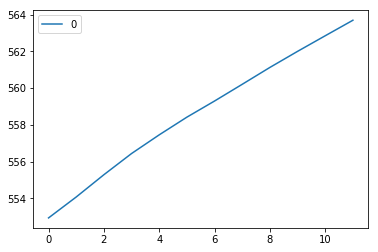

In [14]:
arima_trend_forecast_2016_df = pd.DataFrame(arima_trend_forecast_2016)
arima_trend_forecast_2016_df.plot()

#### Residual forecasts for 2016 (produces forecasts for all but we will use nights forecast only)
- VAR model
- Takes all variables into account and gives predictions for all
- We will be taking the VAR prediction for nights_PAC only

In [15]:
add_residual.head()

,nights_PDL,nights_BRE,nights_NOR,nights_CVL,nights_NAQ,avgtemp_PDL,avgtemp_BRE,avgtemp_NOR,avgtemp_CVL,avgtemp_NAQ,daysoff,gdp_PDL,gdp_BRE,gdp_NOR,gdp_CVL,gdp_NAQ
2010-07-01,-2.689646,4.617104,36.673118,8.052285,29.166868,2.324306,1.803472,2.185417,2.529167,2.125103,0.863889,-110.655228,-66.228940,-75.593194,-50.324587,-132.830626
2010-08-01,-21.918062,13.136188,10.196868,13.251951,-31.572299,0.315972,0.236806,0.260417,0.529167,0.155126,-1.311111,-331.965683,-198.686821,-226.779583,-150.973760,-398.491877
2010-09-01,-4.777396,2.690021,10.596035,7.404535,-11.006049,-0.509028,-0.538194,-0.239583,-0.470833,-0.879478,-0.119444,-553.276139,-331.144701,-377.965972,-251.622934,-664.153129
2010-10-01,-12.196479,-12.515229,-16.060382,-6.872632,-8.252465,-1.875694,-1.063194,-1.172917,-1.270833,-1.371127,1.438889,-774.586595,-463.602581,-529.152361,-352.272107,-929.814381
2010-11-01,-2.692312,-22.831563,-33.113882,-15.791715,-17.810882,-1.400694,-1.354861,-0.906250,-1.237500,-1.460360,-0.061111,-995.897050,-596.060462,-680.338750,-452.921280,-1195.475632


In [36]:
from statsmodels.tsa.api import VAR, DynamicVAR

model = VAR(add_residual, dates=add_residual.index)

lagorder_results = model.select_order(5)
print(lagorder_results.summary())

results = model.fit(maxlags=6, ic='aic')
print(results.summary())

/Users/jinny/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jinny/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:1387: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/jinny/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/jinny/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/jinny/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       31.39       31.97   4.270e+13       31.61
1       49.22       59.14   3.312e+21       53.06
2       40.95       60.22   1.200e+19       48.40
3      -44.40      -15.79   1.439e-12      -33.33
4      -860.9      -822.9      0.000*      -846.2
5     -873.6*     -826.3*       0.000     -855.4*
-------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Aug, 2018
Time:                     21:06:18
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                   -827.292
Nobs:                     54.0000    HQIC:                  -862.410
Log likelihood:           24206.4    FPE:                    0.00000
AIC:                     -884.457    Det(Omega_ml

In [17]:
add_residual.values.shape
#add_residual.values.dtype

(60, 16)

In [57]:
lag_order = results.k_ar
print(lag_order)

add_resid_forecast_2016 = results.forecast(add_residual.values[-lag_order:], 12)


6


In [42]:
add_resid_forecast_2016_df = pd.DataFrame(add_resid_forecast_2016)
add_resid_forecast_2016_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-2.689646,4.617104,36.673118,8.052285,29.166868,2.324306,1.803472,2.185417,2.529167,2.125103,0.863889,-110.655228,-66.228940,-75.593194,-50.324587,-132.830626
1,-21.918063,13.136187,10.196868,13.251951,-31.572299,0.315972,0.236806,0.260417,0.529167,0.155126,-1.311111,-331.965683,-198.686821,-226.779583,-150.973760,-398.491877
2,-4.777396,2.690021,10.596035,7.404535,-11.006049,-0.509028,-0.538194,-0.239583,-0.470833,-0.879478,-0.119444,-553.276139,-331.144701,-377.965972,-251.622934,-664.153129
3,-12.196479,-12.515229,-16.060382,-6.872632,-8.252465,-1.875694,-1.063194,-1.172917,-1.270833,-1.371127,1.438889,-774.586595,-463.602581,-529.152361,-352.272107,-929.814381
4,-2.692313,-22.831562,-33.113882,-15.791715,-17.810882,-1.400694,-1.354861,-0.906250,-1.237500,-1.460360,-0.061111,-995.897050,-596.060462,-680.338750,-452.921280,-1195.475632


In [43]:
add_seasonal_2016_array = add_seasonal_2016.nights_PDL.values
add_seasonal_2016_df = pd.DataFrame(add_seasonal_2016_array)
add_seasonal_2016_df.head(2)


,0
0,-169.663271
1,-153.071438


In [44]:
forecast_2016 = add_seasonal_2016_df[0] + (arima_trend_forecast_2016_df[0] + add_resid_forecast_2016_df[0])
forecast_2016

0     380.579425
1     379.081804
2     466.988474
3     534.217000
4     603.574624
5     722.817774
6     737.606217
7     820.598976
8     649.577877
9     565.951809
10    427.740304
11    421.807764
Name: 0, dtype: float64

In [50]:
nights_PDL_2016 = nights_PDL[(nights_PDL.index>='2016-01-01')&(nights_PDL.index<'2017-01-01')]
nights_PDL_2016 = np.array(nights_PDL_2016.nights_PDL)
nights_PDL_2016_df = pd.DataFrame(nights_PDL_2016)

In [51]:
results.aic

-884.4567000336763

In [53]:
# Define seasonality as 12 (monthly data) in argument when ground truth data includes at least 24 months

def seasonal_MASE(truth, forecast, seasonality=1):    
    period = truth.shape[0] # T
    # print(period)
    forecast_errors = np.abs(truth - forecast)
    # print(forecast_errors)
    mean_absolute_forecast_error = np.sum(forecast_errors) / period
    # print(mean_absolute_forecast_error)

    naive_period = truth.shape[0] - seasonality # T - m
    # print(naive_period)
    # print(truth[seasonality:])
    # print(truth[:period - seasonality])
    naive_errors = np.abs(truth[seasonality:] - truth[:period - seasonality])
    mean_absolute_naive_error = np.sum(naive_errors) / naive_period
    
    return mean_absolute_forecast_error / mean_absolute_naive_error

In [54]:
MASE_2016 = seasonal_MASE(nights_PDL_2016, forecast_2016)
print('MASE: %f' % MASE_2016)

MASE: 0.385354


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_2016 = np.sqrt(mean_squared_error(nights_PDL_2016, forecast_2016))
mae_2016 = mean_absolute_error(nights_PDL_2016, forecast_2016)
print('RMSE:', rmse_2016)
print('MAE:', mae_2016)


RMSE: 40.3720858920871
MAE: 33.9448230769086


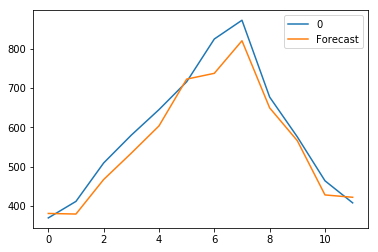

In [56]:
nights_PDL_2016_df.plot(label='Real')
forecast_2016.plot(label='Forecast')
plt.legend()

In [ ]:
# # Gives me second block in array
# print(add_residual.values[1])

# # Gives me last block in array
# print(add_residual.values[-1])

# # Removes first block and gives me the last 2
# print(add_residual.values[-1:2])

# # Gives me only the last 3 blocks
# print(add_residual.values[-3:])

# # Gives me the first block in the array
# print(add_residual.values[0])

# # Gives me from the second block to the last block in the array
# print(add_residual.values[1:])